In [29]:
## Import Dependencies

from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import datetime as dt
import time
import seaborn as sns
import numpy as np
import scipy.stats as stats
import math

In [5]:
#Read in the power data for DP&L
df = pd.read_csv('DPL_Hourly_Consumption.csv',parse_dates =['Datetime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121275 entries, 0 to 121274
Data columns (total 2 columns):
Datetime     121275 non-null datetime64[ns]
DAYTON_MW    121275 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 MB


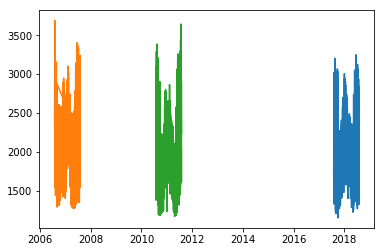

In [25]:
## some simple plots to visualize the data

x = df[(df.Datetime> "2017-08-01") & (df.Datetime <= '2018-08-01')].Datetime
y = df[(df.Datetime> "2017-08-01") & (df.Datetime <= '2018-08-01')].DAYTON_MW
x2 = df[(df.Datetime> "2006-08-01") & (df.Datetime <= '2007-08-01')].Datetime
y2 = df[(df.Datetime> "2006-08-01") & (df.Datetime <= '2007-08-01')].DAYTON_MW
x3 = df[(df.Datetime> "2010-08-01") & (df.Datetime <= '2011-08-01')].Datetime
y3 = df[(df.Datetime> "2010-08-01") & (df.Datetime <= '2011-08-01')].DAYTON_MW
plt.plot(x,y)
plt.plot(x2,y2)
plt.plot(x3,y3)

plt.show()



In [8]:
# Read in Weather Data

Wd = pd.read_json("weather_data_json_dayton_bulkText.json")

In [9]:
Wd.head()
Wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42169 entries, 0 to 42168
Data columns (total 9 columns):
city_id    42169 non-null int64
clouds     42169 non-null object
dt         42169 non-null int64
dt_iso     42169 non-null object
main       42169 non-null object
rain       6327 non-null object
snow       46 non-null object
weather    42169 non-null object
wind       42169 non-null object
dtypes: int64(2), object(7)
memory usage: 2.9+ MB


In [10]:
## Cleaner way to pull this in as datetime.. create column and use the lambda to get rid of the extra UTC datetime data
Wd['Date_Clean'] = (Wd['dt_iso'].apply(lambda x: x[:19])
                    .apply(lambda x : dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
                   )

In [11]:
# because we are going to make use of the dates in our analysis .. rows for month year, day, day of week, and weekend are created. 

Wd2 = Wd.assign(year = Wd['Date_Clean'].dt.year,
         month = Wd['Date_Clean'].dt.month,
         day = Wd['Date_Clean'].dt.day,
         day_of_week = Wd['Date_Clean'].dt.weekday,
         weekend = Wd['Date_Clean'].dt.weekday.apply(lambda x : 1 if x > 4 else 0)).copy()
Wd2.head()

,city_id,clouds,dt,dt_iso,main,rain,snow,weather,wind,Date_Clean,year,month,day,day_of_week,weekend
0,4509884,{'all': 75},1349096400,2012-10-01 13:00:00 +0000 UTC,"{'temp': 284.02, 'temp_min': 282.15, 'temp_max...",NaN,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 2, 'deg': 30}",2012-10-01 13:00:00,2012,10,1,0,0
1,4509884,{'all': 75},1349100000,2012-10-01 14:00:00 +0000 UTC,"{'temp': 285.83, 'temp_min': 284.26, 'temp_max...",NaN,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 2, 'deg': 50}",2012-10-01 14:00:00,2012,10,1,0,0
2,4509884,{'all': 75},1349190000,2012-10-02 15:00:00 +0000 UTC,"{'temp': 287.44, 'temp_min': 286.48, 'temp_max...",NaN,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 3, 'deg': 90}",2012-10-02 15:00:00,2012,10,2,1,0
3,4509884,{'all': 1},1349193600,2012-10-02 16:00:00 +0000 UTC,"{'temp': 288.31, 'temp_min': 287.15, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3, 'deg': 70}",2012-10-02 16:00:00,2012,10,2,1,0
4,4509884,{'all': 40},1349197200,2012-10-02 17:00:00 +0000 UTC,"{'temp': 289.5, 'temp_min': 288.71, 'temp_max'...",NaN,NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 4, 'deg': 80}",2012-10-02 17:00:00,2012,10,2,1,0


,city_id,clouds,dt,dt_iso,main,rain,snow,weather,wind,Date_Clean
0,4509884,{'all': 75},1349096400,2012-10-01 13:00:00 +0000 UTC,"{'temp': 284.02, 'temp_min': 282.15, 'temp_max...",NaN,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 2, 'deg': 30}",2012-10-01 13:00:00
1,4509884,{'all': 75},1349100000,2012-10-01 14:00:00 +0000 UTC,"{'temp': 285.83, 'temp_min': 284.26, 'temp_max...",NaN,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 2, 'deg': 50}",2012-10-01 14:00:00
2,4509884,{'all': 75},1349190000,2012-10-02 15:00:00 +0000 UTC,"{'temp': 287.44, 'temp_min': 286.48, 'temp_max...",NaN,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 3, 'deg': 90}",2012-10-02 15:00:00
3,4509884,{'all': 1},1349193600,2012-10-02 16:00:00 +0000 UTC,"{'temp': 288.31, 'temp_min': 287.15, 'temp_max...",NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 3, 'deg': 70}",2012-10-02 16:00:00
4,4509884,{'all': 40},1349197200,2012-10-02 17:00:00 +0000 UTC,"{'temp': 289.5, 'temp_min': 288.71, 'temp_max'...",NaN,NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 4, 'deg': 80}",2012-10-02 17:00:00


In [12]:
# We have some conversions to do as some of the columns are dicts, and units are not suitable

Temp = []
Humidity = []
Wind = []
Date_Time = []
Rain = []
Month = []
Snow = []
Year = []
Day = []
Day_of_Week = []
Weekend = []

for i in range(0,len(Wd2)):
    #Convert to Fahrenheit
    t = round(((Wd2.main[i]['temp_max']-273.15)*9/5)+32,2)
    h = Wd2.main[i]['humidity']
    #Convert to MPH
    w = round(Wd2.wind[i]['speed']*2.26394,2)
    d = Wd2['Date_Clean'][i]
    r = Wd2.rain[i]
    s = Wd2.snow[i]
    m = Wd2.month[i]
    y = Wd2.year[i]
    dy = Wd2.day[i]
    dow =Wd2.day_of_week[i]
    wknd = Wd2.weekend[i]
    Rain.append(r)
    Snow.append(s)
    Date_Time.append(d)
    Wind.append(w)
    Humidity.append(h)
    Temp.append(t)
    Month.append(m)
    Year.append(y)
    Day.append(dy)
    Day_of_Week.append(dow)
    Weekend.append(wknd)

    
# now we have a group of lists 


In [13]:
#Next build dictionary to reassemble our DF
Wd_dict = {'City':"Dayton,OH",'Datetime':Date_Time,"Year":Year,'Month':Month,'Day':Day,'Day_of_Week':Day_of_Week,'Weekend':Weekend,'Temperature(F)':Temp,
          'Humidity':Humidity,'Wind Speed(mph)':Wind,'Rain Volume':Rain,'Snow Volume':Snow,}
Wd_df = pd.DataFrame(Wd_dict)

In [14]:
Wd_df.head()


,City,Datetime,Year,Month,Day,Day_of_Week,Weekend,Temperature(F),Humidity,Wind Speed(mph),Rain Volume,Snow Volume
0,"Dayton,OH",2012-10-01 13:00:00,2012,10,1,0,0,54.00,81,4.53,NaN,NaN
1,"Dayton,OH",2012-10-01 14:00:00,2012,10,1,0,0,57.99,76,4.53,NaN,NaN
2,"Dayton,OH",2012-10-02 15:00:00,2012,10,2,1,0,59.00,62,6.79,NaN,NaN
3,"Dayton,OH",2012-10-02 16:00:00,2012,10,2,1,0,62.01,77,6.79,NaN,NaN
4,"Dayton,OH",2012-10-02 17:00:00,2012,10,2,1,0,63.00,72,9.06,NaN,NaN


In [14]:
## calling info we confirm we have a datetime object for Datetime
Wd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42169 entries, 0 to 42168
Data columns (total 12 columns):
City               42169 non-null object
Datetime           42169 non-null datetime64[ns]
Year               42169 non-null int64
Month              42169 non-null int64
Day                42169 non-null int64
Day_of_Week        42169 non-null int64
Weekend            42169 non-null int64
Temperature(F)     42169 non-null float64
Humidity           42169 non-null int64
Wind Speed(mph)    42169 non-null float64
Rain Volume        6327 non-null object
Snow Volume        46 non-null object
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 3.9+ MB


In [15]:
## ok now ready we agreed to use more recent data for our dataset so will grab data from May1 of 2016 thru April 30 2018.
df.Datetime.head(24)

df_2 = df[(df.Datetime>='2016-05-01 00:00:00') & (df.Datetime< '2018-05-01 00:00:00')].copy()
df_2.set_index('Datetime',inplace = True)
df_2



,DAYTON_MW
Datetime,
2016-12-31 01:00:00,1788
2016-12-31 02:00:00,1730
2016-12-31 03:00:00,1701
2016-12-31 04:00:00,1693
2016-12-31 05:00:00,1708
2016-12-31 06:00:00,1732
2016-12-31 07:00:00,1778
2016-12-31 08:00:00,1849
2016-12-31 09:00:00,1877


In [16]:
## lets take a look at the len
len(df_2)


17520

In [17]:
## so the Weather Df we create should be of the same length

Wd_df_2 = Wd_df[(Wd_df.Datetime>='2016-05-01 00:00:00') & (Wd_df.Datetime< '2018-05-01 00:00:00')].copy()
Wd_df_2.set_index('Datetime',inplace = True)
Wd_df_2.head()

,City,Year,Month,Day,Day_of_Week,Weekend,Temperature(F),Humidity,Wind Speed(mph),Rain Volume,Snow Volume
Datetime,,,,,,,,,,,
2016-05-01 00:00:00,"Dayton,OH",2016,5,1,6,1,59.0,100,4.53,{'1h': 1.1},NaN
2016-05-01 01:00:00,"Dayton,OH",2016,5,1,6,1,59.0,100,9.06,{'1h': 0.76},NaN
2016-05-01 02:00:00,"Dayton,OH",2016,5,1,6,1,59.0,87,9.06,{'1h': 0.51},NaN
2016-05-01 03:00:00,"Dayton,OH",2016,5,1,6,1,59.0,93,9.06,{'1h': 0.25},NaN
2016-05-01 04:00:00,"Dayton,OH",2016,5,1,6,1,60.8,100,4.53,{'1h': 0.25},NaN


In [46]:
### so it seems we have some missing values in the weather data this will mean some times 76 hours where we will not get a 
## match on the join.

combined_df = df_2.join(Wd_df_2,how = 'left')
combined_df.drop(index = combined_df[combined_df.City.isna()].index.values,inplace = True)
combined_df.head()

,DAYTON_MW,City,Year,Month,Day,Day_of_Week,Weekend,Temperature(F),Humidity,Wind Speed(mph),Rain Volume,Snow Volume
Datetime,,,,,,,,,,,,
2016-05-01 00:00:00,1473,"Dayton,OH",2016.0,5.0,1.0,6.0,1.0,59.0,100.0,4.53,{'1h': 1.1},NaN
2016-05-01 01:00:00,1392,"Dayton,OH",2016.0,5.0,1.0,6.0,1.0,59.0,100.0,9.06,{'1h': 0.76},NaN
2016-05-01 02:00:00,1337,"Dayton,OH",2016.0,5.0,1.0,6.0,1.0,59.0,87.0,9.06,{'1h': 0.51},NaN
2016-05-01 03:00:00,1301,"Dayton,OH",2016.0,5.0,1.0,6.0,1.0,59.0,93.0,9.06,{'1h': 0.25},NaN
2016-05-01 04:00:00,1273,"Dayton,OH",2016.0,5.0,1.0,6.0,1.0,60.8,100.0,4.53,{'1h': 0.25},NaN


In [45]:
combined_df[combined_df.Year==2017 ]["Temperature(F)"]

Datetime
2017-01-01 00:00:00    42.8
2017-01-01 01:00:00    42.8
2017-01-01 02:00:00    42.8
2017-01-01 03:00:00    42.8
2017-01-01 04:00:00    42.8
2017-01-01 05:00:00    42.8
2017-01-01 06:00:00    42.8
2017-01-01 07:00:00    39.2
2017-01-01 08:00:00    35.6
2017-01-01 09:00:00    35.6
2017-01-01 10:00:00    30.2
2017-01-01 11:00:00    33.8
2017-01-01 12:00:00    30.2
2017-01-01 13:00:00    32.0
2017-01-01 14:00:00    30.2
2017-01-01 15:00:00    33.8
2017-01-01 16:00:00    35.6
2017-01-01 17:00:00    39.2
2017-01-01 18:00:00    42.8
2017-01-01 19:00:00    44.6
2017-01-01 20:00:00    46.4
2017-01-01 21:00:00    46.4
2017-01-01 22:00:00    46.4
2017-01-01 23:00:00    42.8
2017-01-02 00:00:00    42.8
2017-01-02 01:00:00    39.2
2017-01-02 02:00:00    42.8
2017-01-02 03:00:00    42.8
2017-01-02 04:00:00    44.6
2017-01-02 05:00:00    42.8
                       ... 
2017-12-30 18:00:00    19.4
2017-12-30 19:00:00    19.4
2017-12-30 20:00:00    17.6
2017-12-30 21:00:00    15.8
2017-12-30 

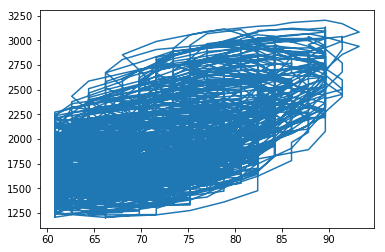

1818.355195774163

In [19]:
x= combined_df[(combined_df["Temperature(F)"]> 60)&(combined_df.Year == 2017)]['Temperature(F)']
y= combined_df[(combined_df["Temperature(F)"]>60)&(combined_df.Year == 2017)]['DAYTON_MW']
x2 =combined_df.iloc[150:]['Humidity']
plt.plot(x,y)

plt.show()
Covar = np.cov(x.values,y.values)[0,1]
#x.values
Covar

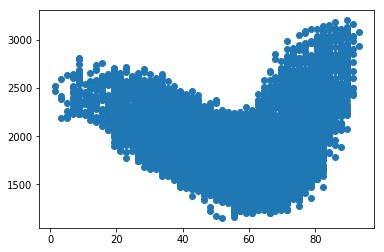

In [27]:
x= combined_df[combined_df.Year == 2017]['Temperature(F)']
y= combined_df[combined_df.Year == 2017]['DAYTON_MW']
                
plt.scatter(x,y)
plt.show()
            

(array([2.000e+00, 4.000e+00, 0.000e+00, 2.200e+01, 4.600e+01, 7.200e+01,
        3.170e+02, 1.442e+03, 2.827e+03, 3.990e+03]),
 array([0.48542683, 1.09110995, 1.69679307, 2.30247619, 2.90815932,
        3.51384244, 4.11952556, 4.72520868, 5.33089181, 5.93657493,
        6.54225805]),
 <a list of 10 Patch objects>)

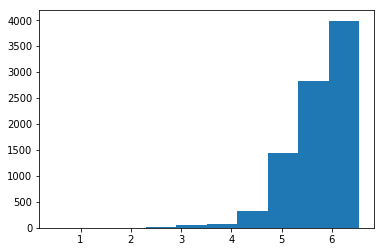

In [36]:
mylist = []

for i in range(0,len(x)):
    z = math.log2(x[i])
    mylist.append(z)
mylist
plt.hist(mylist)

(array([  77.,  170.,  597., 1111., 1219., 1389., 1565., 1536.,  895.,
         163.]),
 array([1547.01 , 1556.789, 1566.568, 1576.347, 1586.126, 1595.905,
        1605.684, 1615.463, 1625.242, 1635.021, 1644.8  ]),
 <a list of 10 Patch objects>)

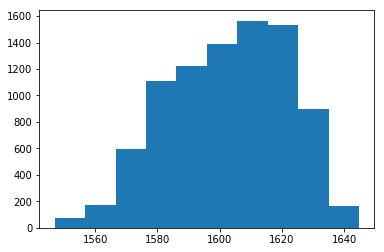

In [49]:
temp = []
for i in range(0,len(combined_df[combined_df.Year == 2017])):
    t = combined_df.iloc[i]["Temperature(F)"]
    for j in range(0,23):
        t += combined_df.iloc[j]["Temperature(F)"]
    temp.append(t.mean())
temp
plt.hist(temp)   

In [50]:
power = []
for i in range(0,len(combined_df[combined_df.Year == 2017])):
    p = combined_df.iloc[i]["DAYTON_MW"]
    for j in range(0,23):
        p += combined_df.iloc[j]["DAYTON_MW"]
    power.append(p.mean())
power

[36578.0,
 36497.0,
 36442.0,
 36406.0,
 36378.0,
 36384.0,
 36402.0,
 36437.0,
 36480.0,
 36565.0,
 36637.0,
 36664.0,
 36692.0,
 36709.0,
 36720.0,
 36723.0,
 36751.0,
 36788.0,
 36822.0,
 36833.0,
 36831.0,
 36887.0,
 36894.0,
 36774.0,
 36670.0,
 36600.0,
 36547.0,
 36509.0,
 36496.0,
 36530.0,
 36646.0,
 36841.0,
 36959.0,
 37017.0,
 37057.0,
 37084.0,
 37082.0,
 37088.0,
 37092.0,
 37076.0,
 37041.0,
 37027.0,
 37023.0,
 37005.0,
 37002.0,
 37021.0,
 37012.0,
 36882.0,
 36754.0,
 36675.0,
 36613.0,
 36566.0,
 36553.0,
 36588.0,
 36706.0,
 36900.0,
 37007.0,
 37046.0,
 37060.0,
 37083.0,
 37069.0,
 37064.0,
 37020.0,
 37036.0,
 36999.0,
 36986.0,
 36968.0,
 36959.0,
 36951.0,
 36999.0,
 37022.0,
 36902.0,
 36760.0,
 36674.0,
 36628.0,
 36582.0,
 36583.0,
 36620.0,
 36735.0,
 36930.0,
 37013.0,
 37049.0,
 37065.0,
 37088.0,
 37096.0,
 37098.0,
 37088.0,
 37069.0,
 37027.0,
 37008.0,
 37007.0,
 37002.0,
 37012.0,
 37067.0,
 37064.0,
 36944.0,
 36827.0,
 36757.0,
 36687.0,
 36648.0,


(array([ 314., 1212., 1513., 2141., 1454.,  922.,  556.,  308.,  182.,
         120.]),
 array([36304. , 36516.8, 36729.6, 36942.4, 37155.2, 37368. , 37580.8,
        37793.6, 38006.4, 38219.2, 38432. ]),
 <a list of 10 Patch objects>)

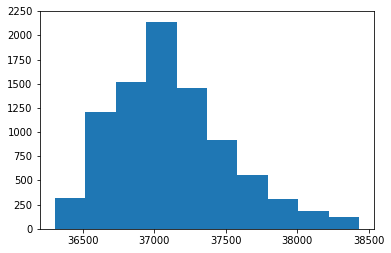

In [51]:
plt.hist(power)

In [52]:
stats.pearsonr(temp,power)

(0.1888854908898368, 7.293136184303168e-71)

In [57]:
x.values.std()
y.values.std()
correl = round(Covar/(x.values.std()*y.values.std()),2)
correl


0.57

In [59]:
stats.pearsonr(x, y)
stats.ttest_ind(x,y, equal_var = False)

Ttest_indResult(statistic=-306.00875109051265, pvalue=0.0)

In [66]:

First_Week_df = combined_df[(combined_df.index >= '2016-07-01') & (combined_df.index < '2016-07-07')]
June = combined_df
FWmean = round(First_Week_df['Temperature(F)'].mean(),2)
FWstd = round(First_Week_df["Temperature(F)"].std(),2)
FWsem = round(First_Week_df["Temperature(F)"].sem(),2)
FWsem
First_Week_df['DAYTON_MW'].mean()
First_Week_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2016-07-01 00:00:00 to 2016-07-06 23:00:00
Data columns (total 12 columns):
DAYTON_MW          144 non-null int64
City               144 non-null object
Year               144 non-null float64
Month              144 non-null float64
Day                144 non-null float64
Day_of_Week        144 non-null float64
Weekend            144 non-null float64
Temperature(F)     144 non-null float64
Humidity           144 non-null float64
Wind Speed(mph)    144 non-null float64
Rain Volume        37 non-null object
Snow Volume        0 non-null object
dtypes: float64(8), int64(1), object(3)
memory usage: 14.6+ KB


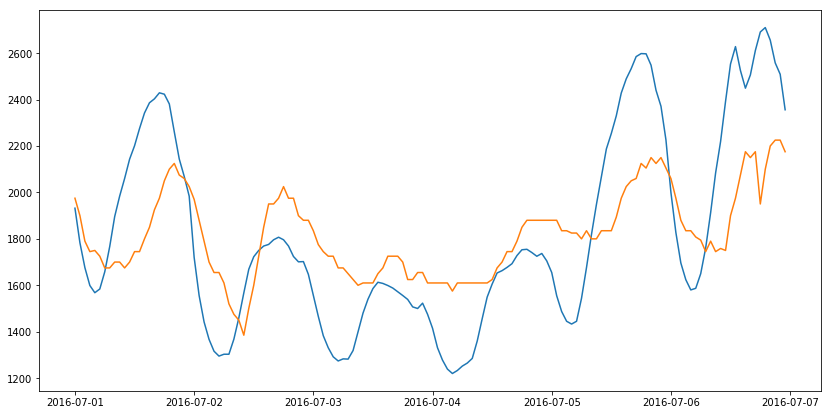

In [67]:
plt.figure(figsize=[14,7])


x = First_Week_df.index   #['Temperature(F)']
y = First_Week_df["DAYTON_MW"]
y2 = First_Week_df['Temperature(F)']*25
#plt.xlim("2016-05-01","2016-05-08")
plt.plot(x,y)
plt.plot(x,y2)



3.2

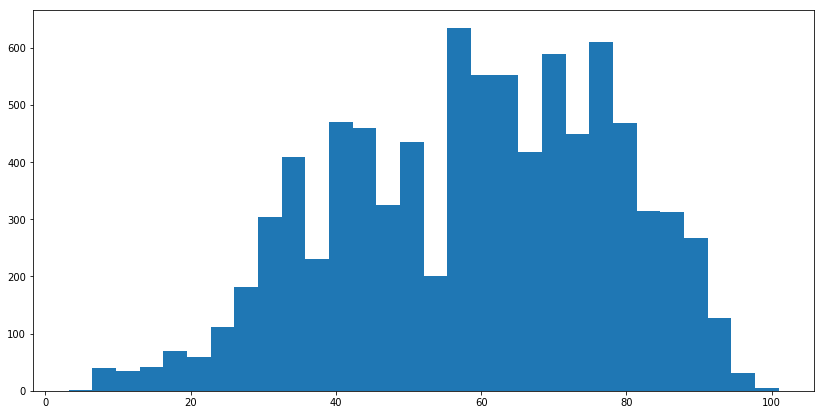

In [37]:
plt.figure(figsize= [14,7])

x = combined_df[combined_df.index < "2017-05-01"]["Temperature(F)"]

plt.hist(x,bins = 30)
x.min()

2016.1043987596188

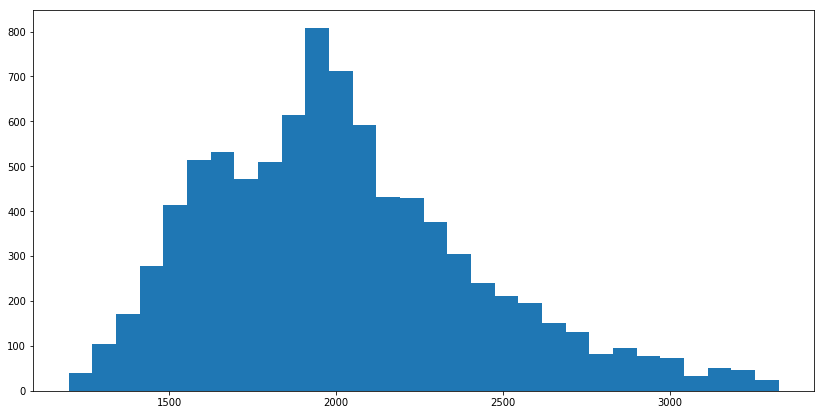

In [47]:
plt.figure(figsize= [14,7])

x = combined_df[combined_df.index < "2017-05-01"]["DAYTON_MW"]

plt.hist(x,bins = 30)
x.mean()

1974.030612244898

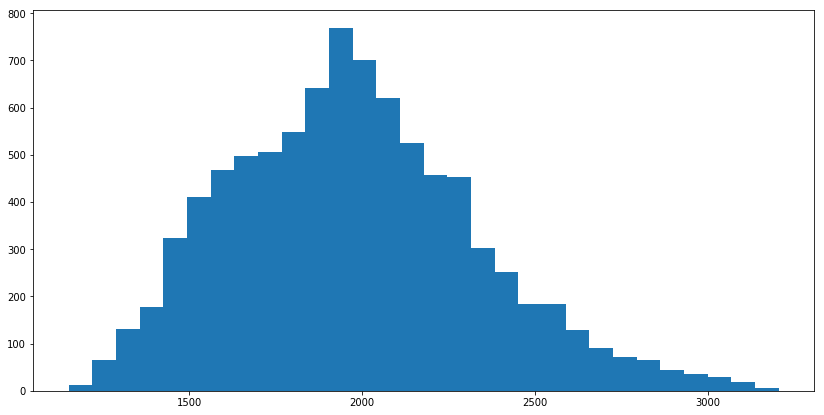

In [65]:
plt.figure(figsize= [14,7])

x = combined_df[combined_df.Year == 2017]["DAYTON_MW"]

plt.hist(x,bins = 30)
x.mean()

93.2

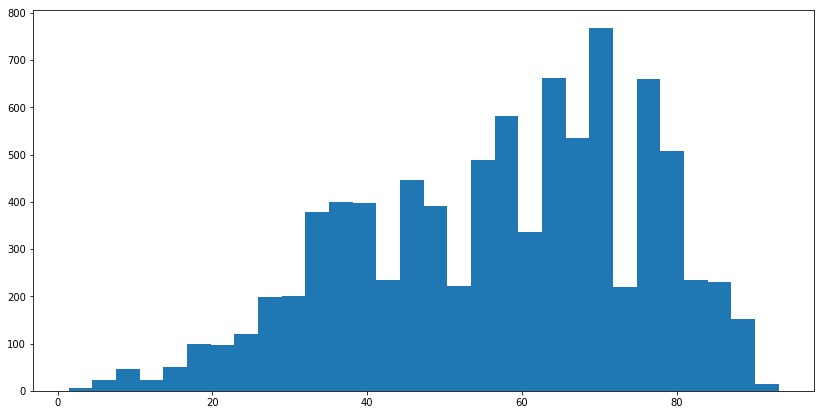

In [64]:
plt.figure(figsize= [14,7])

x = combined_df[combined_df.Year== 2017]["Temperature(F)"]

plt.hist(x,bins = 30)
x.max()

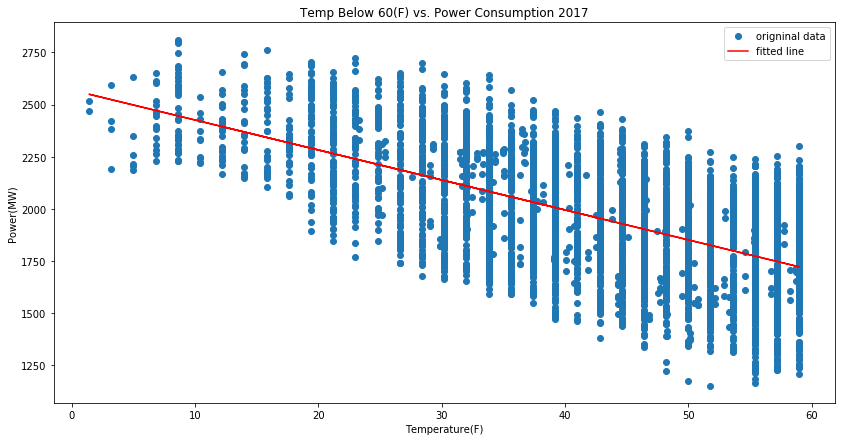

In [72]:
plt.figure(figsize = (14,7))

x= combined_df[(combined_df["Temperature(F)"]< 60)&(combined_df.Year == 2017)]['Temperature(F)']
y= combined_df[(combined_df["Temperature(F)"]<60)&(combined_df.Year == 2017)]['DAYTON_MW']
stats.linregress(x,y)
plt.plot(x,y,'o',label = "origninal data")
plt.plot(x, stats.linregress(x,y).intercept + stats.linregress(x,y).slope*x, 'r', label='fitted line')
plt.xlabel("Temperature(F)")
plt.ylabel("Power(MW)")
plt.title("Temp Below 60(F) vs. Power Consumption 2017")

plt.legend()
plt.show()


In [73]:
stats.linregress(x,y)

LinregressResult(slope=-14.389642640685963, intercept=2569.6748309438135, rvalue=-0.5995904339690555, pvalue=0.0, stderr=0.2895513514833273)

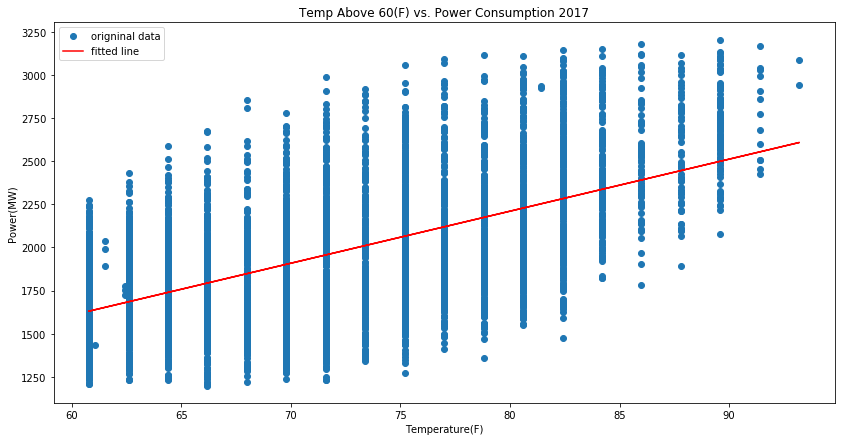

In [70]:
plt.figure(figsize = (14,7))

x= combined_df[(combined_df["Temperature(F)"]> 60)&(combined_df.Year == 2017)]['Temperature(F)']
y= combined_df[(combined_df["Temperature(F)"]>60)&(combined_df.Year == 2017)]['DAYTON_MW']
stats.linregress(x,y)
plt.plot(x,y,'o',label = "origninal data")
plt.plot(x, stats.linregress(x,y).intercept + stats.linregress(x,y).slope*x, 'r', label='fitted line')
plt.xlabel("Temperature(F)")
plt.ylabel("Power(MW)")
plt.title("Temp Above 60(F) vs. Power Consumption 2017")

plt.legend()
plt.show()

In [71]:
stats.linregress(x,y)

LinregressResult(slope=30.152200042584933, intercept=-202.40788323442484, rvalue=0.5710463228350132, pvalue=0.0, stderr=0.6596385681034164)